In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pyproj

In [2]:
lat, lon = 51.213437, 5.086303

In [3]:
NX, NY, X0, Y0, CS, NV, NL = 2410, 1220, 21000, 128000, 100, -9999, 44

COLOR_MAP = {
    '0101Q_We':             '#FFF2D3',
    '0102Q_Ma':             '#FFF2C7',
    '0103Q_Me':             '#F9E77F',
    '0201NE_Li_Pd_Ml_Kz':   '#8DCB41',
    '0202NE_Kd_Kl':         '#59BC9D',
    '0203NE_Di':            '#EF886F',
    '0204NE_Bc_Bb':         '#BEDEC4',
    '0301PA_Vo':            '#8DCFF4',
    '0302PA_Eg':            '#2FB9EF',
    '0303PA_Bm':            '#2C73B9',
    '0304PA_Bi':            '#8BAED8',
    '0305PA_Bo':            '#E3B2C8',
    '0306PA_Zz_Sh':         '#E4A3C2',
    '0307PA_Ma':            '#AD894A',
    '0308PA_Ld':            '#F8CC61',
    '0309PA_Br':            '#FDF76C',
    '0310PA_Aa':            '#79C489',
    '0311PA_Ge':            '#E2988D',
    '0312PA_Tt':            '#D2B0CE',
    '0313PA_Ko':            '#9085BA',
    '0314PA_Ti':            '#FDD48F',
    '0315PA_Hn':            '#C6710A',
    '0316PA_Hs':            '#FFF9A8',
    '0317PA_Op':            '#FFFCDA',
    '0318PA_Ho':            '#F3C200',
    '0401KR_Ma_Ku':         '#F2FA8C',
    '0402KR_GuBe_Do2':      '#E6F47F',
    '0403KR_NeSt_GuZe_Do1': '#D9EF74',
    '0404KR_NeWa_Va':       '#CCE968',
    '0405KR_Ak':            '#BFE35D',
    '0406KR_Ms_Es_Vg_Be':   '#B3DE53',
    '05JU_06TR_07PE':       '#34B2C9',
    '0801CA_We':            '#BFD0C5',
    '0802CA_Na':            '#B3BE6C',
    '0803CA_Di':            '#99B46C',
    '09DE':                 '#CB8C37',
    '10SI_11OR_12CM':       '#99C08D',
}

In [4]:
x = np.arange(X0, X0+NX*CS, CS)
y = np.arange(Y0, Y0+NY*CS, CS)[::-1]
xs, ys = np.meshgrid(x, y)

proj = pyproj.Proj(init='epsg:31370')
lons, lats = proj(xs, ys, inverse=True)

lons_ = lons.flatten()
lats_ = lats.flatten()

lon_ = [lon] * len(lons_)
lat_ = [lat] * len(lats_)

_G = pyproj.Geod(ellps='WGS84') 
distances = _G.inv(lon_, lat_, lons_, lats_)[-1]

index = np.argmin(distances)
index = np.unravel_index(index, lons.shape)

In [5]:
root_folder = %pwd

folder = os.path.join(root_folder, '..', 'Data', 'GRDVL2', 'rasters_asc')

data = np.empty((NL, NY, NX))

horizonts = []
filespecs = []
for sub_folder in os.listdir(folder)[:-1]:
    for file in os.listdir(os.path.join(folder, sub_folder)):
        if file.endswith('.asc'):
            filespecs.append(os.path.join(folder, sub_folder, file))
            horizonts.append(file[:-4])

for i, fs in enumerate(filespecs):
    print(i, fs)
    data[i] = np.loadtxt(fs, skiprows=6)

0 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\00DEM\00DEM.asc
1 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\01Q\0101Q_We_b.asc
2 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\01Q\0102Q_Ma_b.asc
3 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\01Q\0103Q_Me_b.asc
4 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\01Q\01Q_b.asc
5 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\01Q\01Q_d.asc
6 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\02NE\0201NE_Li_Pd_Ml_Kz_b.asc
7 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\02NE\0202NE_Kd_Kl_b.asc
8 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\Notebooks\..\Data\GRDVL2\rasters_asc\02NE\0203NE_Di_b.asc
9 C:\Users\Bart Vleminckx\OneDrive\Work\Transfer\N

In [6]:
data = data[:,index[0],index[1]]

In [7]:
hs, ds = [], []

d0 = data[0]

for i, (h, d) in enumerate(zip(horizonts, data)):
    if h[-2:] in ('_t', '_b', 'EM') and d != -9999:
        hs.append(h)
        ds.append(d-d0)

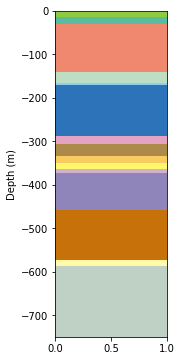

In [8]:
fig, ax = plt.subplots(figsize=(2, 6))

for i, (h, d) in enumerate(zip(hs, ds)):
    #plt.scatter(0, d)
    if i != 0:
        c = COLOR_MAP.get(h[:-2], None)
        #print(h, c)
        if c is not None:
            ax.axhspan(ds[i-1], d, color=c, label=h)
    if i == 24:
        break



ax.set_ylim((-750, 0))

ax.set_ylabel('Depth (m)')

#plt.legend()
plt.show()